# Web Content Data Clustering Using K-Means 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get The Data
### Read in the data file using read.csv  Figure out the whole dataset here

In [2]:
df= pd.read_csv('K:/ZDATA/result.csv')

### Check the head of the data

In [4]:
df.head()

,text,url,bounds/width,bounds/height,bounds/left,bounds/right,bounds/top,bounds/bottom,bounds/fontSize,bounds/density,...,bounds/areaDensity,bounds/text_count,meta/moreBigText,meta/isDownTitle,meta/tagName,meta/hasCluster,computed/transform_origin,computed/perspective_origin,computed/line_height,computed/position
0,"Elon Musk, guardián de la galaxia",https://elpais.com/elpais/2018/04/25/icon/1524...,980.0,47.0,310.0,1290.0,209.0,256.0,42.0196,309.228071,...,2002.309539,33,True,False,H1,False,490.0,490.0,47.9024,relative
1,Lo que separa a este hombre de anteriores char...,https://elpais.com/elpais/2018/04/25/icon/1524...,980.0,54.0,310.0,1290.0,270.0,324.0,20.0014,229.601829,...,1991.400622,166,False,True,H2,False,490.0,490.0,27.0019,relative
2,Elon Musk dice tener un proyecto de nave espac...,https://elpais.com/elpais/2018/04/25/icon/1524...,980.0,48.0,310.0,1290.0,1085.0,1133.0,12.9941,213.267438,...,2000.703607,234,False,True,FIGCAPTION,False,490.0,490.0,14.0336,relative
3,27 ABR 2018 - 10:56CEST,https://elpais.com/elpais/2018/04/25/icon/1524...,980.0,18.0,310.0,1290.0,1179.0,1197.0,17.0080,222.968608,...,2060.151068,23,False,True,DIV,False,490.0,490.0,16,relative
4,En el fulgor marfileño de la dentadura de Elon...,https://elpais.com/elpais/2018/04/25/icon/1524...,640.0,140.0,310.0,950.0,1217.0,1357.0,17.0080,282.752542,...,1942.405818,369,False,True,P,True,320.0,320.0,28.0632,relative


### Check the info of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7879 entries, 0 to 7878
Data columns (total 21 columns):
text                           7879 non-null object
url                            7879 non-null object
bounds/width                   7879 non-null float64
bounds/height                  7879 non-null float64
bounds/left                    7879 non-null float64
bounds/right                   7879 non-null float64
bounds/top                     7879 non-null float64
bounds/bottom                  7879 non-null float64
bounds/fontSize                7879 non-null float64
bounds/density                 7874 non-null float64
bounds/densityOnScreen         7879 non-null float64
bounds/areaDensity             7879 non-null float64
bounds/text_count              7879 non-null int64
meta/moreBigText               7879 non-null bool
meta/isDownTitle               7879 non-null bool
meta/tagName                   7879 non-null object
meta/hasCluster                7879 non-null bool
comput

### Describe the dataset

In [6]:
df.describe()

,bounds/width,bounds/height,bounds/left,bounds/right,bounds/top,bounds/bottom,bounds/fontSize,bounds/density,bounds/densityOnScreen,bounds/areaDensity,bounds/text_count,computed/transform_origin,computed/perspective_origin
count,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7874.000000,7.879000e+03,7879.000000,7879.0000,7879.000000,7879.000000
mean,518.067601,99.263533,516.936495,1035.004095,3332.453073,3431.716606,17.644236,240.042142,6.368491e+03,2011.559698,161.5686,257.735789,257.735789
std,273.817975,168.443675,1019.625274,965.942294,3367.264932,3368.413042,5.983419,307.140299,4.594008e+04,79.350065,261.0093,129.076842,129.076842
min,58.000000,11.000000,-13434.500000,-12904.500000,-5000.000000,-4800.000000,0.000000,50.309045,5.005991e+02,666.508750,5.0000,0.000000,0.000000
25%,292.000000,46.000000,310.000000,942.500000,1281.000000,1391.812500,15.000000,112.143880,7.932160e+02,1977.780022,65.0000,146.000000,146.000000
50%,540.000000,69.000000,415.000000,1021.000000,2441.281250,2550.625000,16.000000,188.342760,1.410726e+03,2037.960367,90.0000,270.000000,270.000000
75%,665.000000,112.000000,809.390625,1277.500000,4104.906250,4199.585938,19.000000,301.241182,5.051452e+03,2066.487387,190.5000,332.500000,332.500000
max,5280.859375,8334.562500,7409.546875,7705.546875,22499.125000,22547.125000,80.000000,9951.493807,2.282233e+06,2089.065923,9138.0000,800.000000,800.000000


### Now describe the head and tail of the dataset. Here Head and tail report seems same.

In [7]:
df.describe().head

<bound method NDFrame.head of        bounds/width  bounds/height   bounds/left  bounds/right    bounds/top  \
count   7879.000000    7879.000000   7879.000000   7879.000000   7879.000000   
mean     518.067601      99.263533    516.936495   1035.004095   3332.453073   
std      273.817975     168.443675   1019.625274    965.942294   3367.264932   
min       58.000000      11.000000 -13434.500000 -12904.500000  -5000.000000   
25%      292.000000      46.000000    310.000000    942.500000   1281.000000   
50%      540.000000      69.000000    415.000000   1021.000000   2441.281250   
75%      665.000000     112.000000    809.390625   1277.500000   4104.906250   
max     5280.859375    8334.562500   7409.546875   7705.546875  22499.125000   

       bounds/bottom  bounds/fontSize  bounds/density  bounds/densityOnScreen  \
count    7879.000000      7879.000000     7874.000000            7.879000e+03   
mean     3431.716606        17.644236      240.042142            6.368491e+03   
std   

## Create Some Data Visualization
#### Create a Scatterplot of "bounds/density" vs "bounds/areaDensity" where the points are colored by the  meta/cluster  column

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


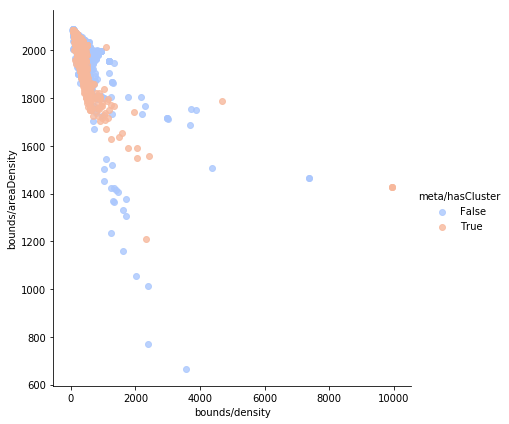

In [8]:
sns.lmplot(x='bounds/density', y= 'bounds/areaDensity', data= df, hue='meta/hasCluster',fit_reg=False, palette='coolwarm',size=6, aspect=1)

In [9]:
df_data=df.ix[:,(10,11)].values
df_data_names= ['bounds/density','bounds/areaDensity']
y= df.ix[:,9].values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


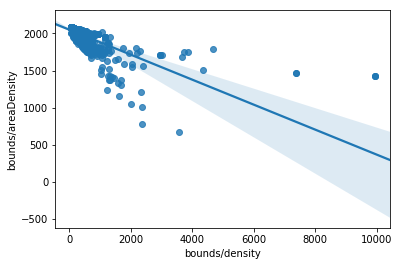

In [10]:
sns.regplot(x='bounds/density', y='bounds/areaDensity', data= df, scatter=True)

### Now create a stacked histogram showing  the output of  the two columns bounds/density and bounds/areaDensity

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


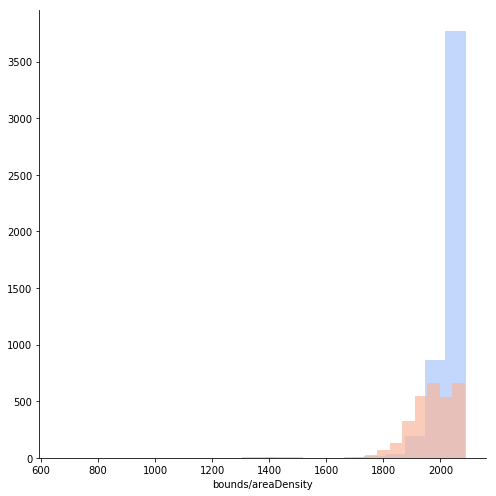

In [11]:
g= sns.FacetGrid(df, hue='meta/hasCluster',palette='coolwarm', size=7 ,aspect=1)
g= g.map(plt.hist,'bounds/areaDensity', bins=20, alpha=0.7)

 ### Again descriptive statistics of the dataset

In [12]:
df.describe().transpose

<bound method DataFrame.transpose of        bounds/width  bounds/height   bounds/left  bounds/right    bounds/top  \
count   7879.000000    7879.000000   7879.000000   7879.000000   7879.000000   
mean     518.067601      99.263533    516.936495   1035.004095   3332.453073   
std      273.817975     168.443675   1019.625274    965.942294   3367.264932   
min       58.000000      11.000000 -13434.500000 -12904.500000  -5000.000000   
25%      292.000000      46.000000    310.000000    942.500000   1281.000000   
50%      540.000000      69.000000    415.000000   1021.000000   2441.281250   
75%      665.000000     112.000000    809.390625   1277.500000   4104.906250   
max     5280.859375    8334.562500   7409.546875   7705.546875  22499.125000   

       bounds/bottom  bounds/fontSize  bounds/density  bounds/densityOnScreen  \
count    7879.000000      7879.000000     7874.000000            7.879000e+03   
mean     3431.716606        17.644236      240.042142            6.368491e+03   

### The distribution of the computed/transform_origin  and computed/perspective_origin has been illustrated with a distplot and violinplot.

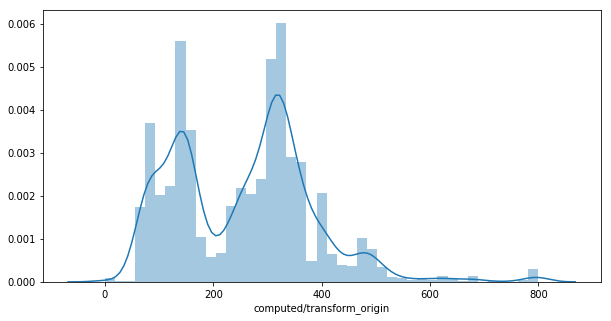

In [13]:
plt.figure(figsize=(10,5))
plot_transform = sns.distplot(df["computed/transform_origin"])
 

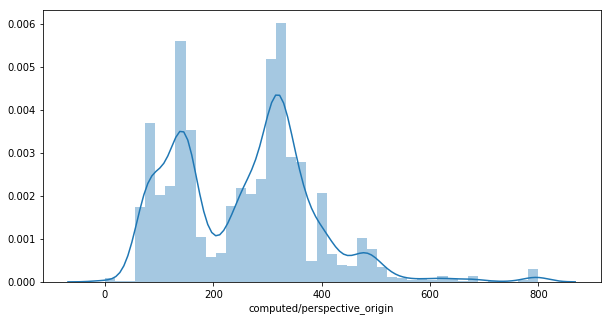

In [14]:
plt.figure(figsize=(10,5))
plot_transform = sns.distplot(df["computed/perspective_origin"])

## Now Plot both column as xlabel

Text(0.5, 0, 'computed/transform_origin /computed/line_height ')

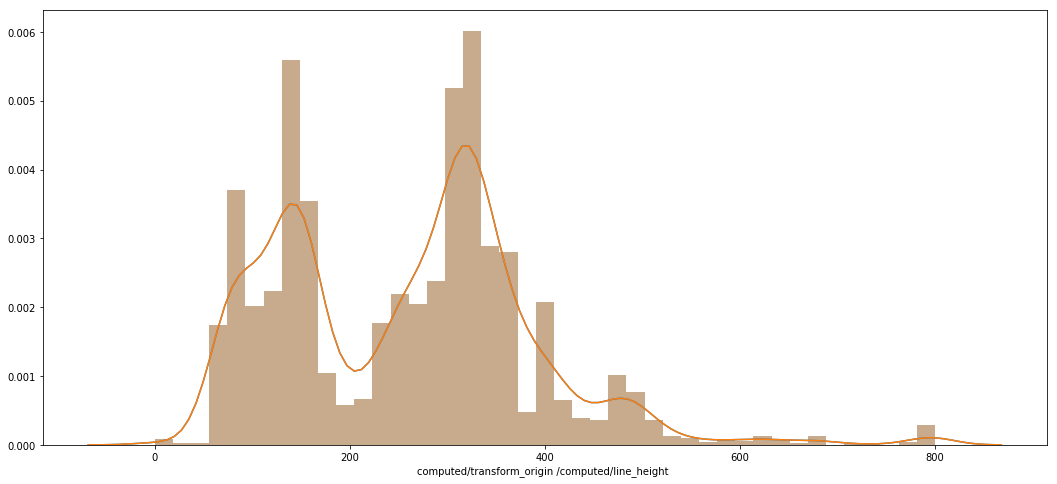

In [20]:
plt.figure(figsize=(18,8))
plot_transform = sns.distplot(df["computed/transform_origin"])
plot_transform = sns.distplot(df["computed/perspective_origin"])
plt.xlabel('computed/transform_origin /computed/line_height ')

# Implementation of K-Means Clustering in this Web Elements Dataset to set for the k parameter in the model

### KMeans Method

In [32]:
import sklearn
 
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

In [34]:
 from sklearn.cluster import KMeans

In [61]:
kmeans = KMeans(n_clusters=6)

In [62]:
X = np.array(df['bounds/areaDensity'])

In [63]:
X = X.reshape(-1,1)

In [64]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [65]:
centers = kmeans.cluster_centers_
centers

array([[1936.01614769],
       [2063.31084644],
       [1479.24115102],
       [2003.46446203],
       [1016.01383969],
       [1838.24758527]])

In [66]:
kmeans.labels_

array([3, 3, 3, ..., 3, 3, 1])

In [67]:
def converter(txt):
    if txt == 'True':
        return 1
    else:
        return 0

In [68]:
df['Cluster']= df['bounds/areaDensity'].apply(converter)

In [69]:
df.head()

,text,url,bounds/width,bounds/height,bounds/left,bounds/right,bounds/top,bounds/bottom,bounds/fontSize,bounds/density,...,bounds/text_count,meta/moreBigText,meta/isDownTitle,meta/tagName,meta/hasCluster,computed/transform_origin,computed/perspective_origin,computed/line_height,computed/position,Cluster
0,"Elon Musk, guardián de la galaxia",https://elpais.com/elpais/2018/04/25/icon/1524...,980.0,47.0,310.0,1290.0,209.0,256.0,42.0196,309.228071,...,33,True,False,H1,False,490.0,490.0,47.9024,relative,0
1,Lo que separa a este hombre de anteriores char...,https://elpais.com/elpais/2018/04/25/icon/1524...,980.0,54.0,310.0,1290.0,270.0,324.0,20.0014,229.601829,...,166,False,True,H2,False,490.0,490.0,27.0019,relative,0
2,Elon Musk dice tener un proyecto de nave espac...,https://elpais.com/elpais/2018/04/25/icon/1524...,980.0,48.0,310.0,1290.0,1085.0,1133.0,12.9941,213.267438,...,234,False,True,FIGCAPTION,False,490.0,490.0,14.0336,relative,0
3,27 ABR 2018 - 10:56CEST,https://elpais.com/elpais/2018/04/25/icon/1524...,980.0,18.0,310.0,1290.0,1179.0,1197.0,17.0080,222.968608,...,23,False,True,DIV,False,490.0,490.0,16,relative,0
4,En el fulgor marfileño de la dentadura de Elon...,https://elpais.com/elpais/2018/04/25/icon/1524...,640.0,140.0,310.0,950.0,1217.0,1357.0,17.0080,282.752542,...,369,False,True,P,True,320.0,320.0,28.0632,relative,0


In [70]:

print(confusion_matrix(df['Cluster'],kmeans.labels_))
print('\n')
print(classification_report(df['Cluster'],kmeans.labels_))

[[1371 4120   27 1938    7  416]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]]


              precision    recall  f1-score   support

           0       1.00      0.17      0.30      7879
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

   micro avg       0.17      0.17      0.17      7879
   macro avg       0.17      0.03      0.05      7879
weighted avg       1.00      0.17      0.30      7879



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


 ## Using the dendrogram to find the optimal number of clusters

In [72]:
 import scipy.cluster.hierarchy as sch

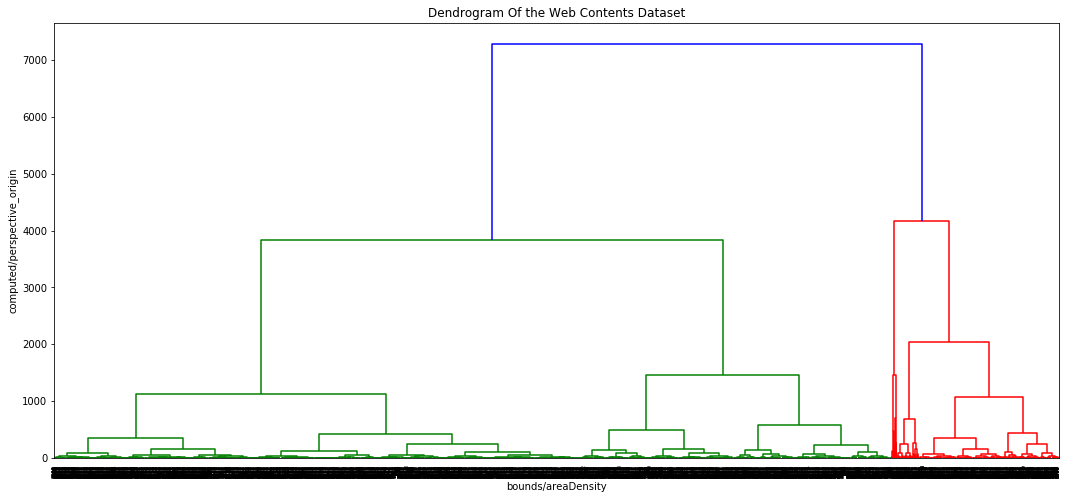

In [73]:
plt.figure(figsize=(18,8))
dend=sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram Of the Web Contents Dataset")
plt.xlabel('bounds/areaDensity')
plt.ylabel('computed/perspective_origin')
plt.show()